In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns

In [7]:
base_path = "D:\\rl_soccer\\results\\resultados\\T1_2vs0_final\\"
dirs = os.listdir(base_path)

In [8]:
dirs

['2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58',
 '2022-01-07_00-02-21_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_02_21',
 '2022-01-07_00-04-28_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_04_28',
 '2022-01-07_00-04-53_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_04_53']

In [9]:
agents_statistics = pd.DataFrame(columns=['path',"success_rate", "mean_steps", "std_steps", "std_meanvel_p0", "std_meanvel_p1"])
dirs = os.listdir(base_path)
for c in dirs:
    res_path = os.path.join(base_path, c, "test_results")

    for directory in os.listdir(res_path):
        if directory[-4:] != "test":
            run_progress = pd.read_csv(os.path.join(res_path, directory,"progress.txt"), delimiter="\t")


            #get succes rate: 
            successful_games = np.where(run_progress["success"])[0]
            successful_game_count = np.sum(run_progress["success"])
            success_rate = successful_game_count/run_progress.shape[0]
            
            if success_rate>0.98:
                # get mean steps and std:
                mean_steps = np.mean(run_progress["steps"])
                std_steps = np.std(run_progress["steps"])

                # get speed variance: 
                std_meanvel_p0 = np.std(run_progress["Averagevel_player_0"])
                std_meanvel_p1 = np.std(run_progress["Averagevel_player_1"])

                value_dict = {"path": os.path.join(res_path, directory),
                             "success_rate": success_rate,
                             "mean_steps": mean_steps,
                             "std_steps": std_steps,
                             "std_meanvel_p0": std_meanvel_p0,
                             "std_meanvel_p1": std_meanvel_p1}

                agents_statistics = agents_statistics.append(value_dict, ignore_index=True)

        
        
        
        

C:\Users\rocho\AppData\Local\Temp\ipykernel_23896\2787100800.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agents_statistics = agents_statistics.append(value_dict, ignore_index=True)
C:\Users\rocho\AppData\Local\Temp\ipykernel_23896\2787100800.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agents_statistics = agents_statistics.append(value_dict, ignore_index=True)
C:\Users\rocho\AppData\Local\Temp\ipykernel_23896\2787100800.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agents_statistics = agents_statistics.append(value_dict, ignore_index=True)
C:\Users\rocho\AppData\Local\Temp\ipykernel_23896\2787100800.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

In [10]:
agents_statistics.set_index("path", inplace=True)

In [11]:
agents_statistics.head()

,success_rate,mean_steps,std_steps,std_meanvel_p0,std_meanvel_p1
path,,,,,
D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_01-49-27_model2159999.pt_test_run,0.994,69.018,29.069601,0.934044,1.084434
D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_01-55-53_model2389999.pt_test_run,0.996,67.352,26.841015,1.02896,1.067894
D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_02-23-31_model2889999.pt_test_run,0.998,66.56,24.59395,0.954547,1.094281
D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_02-42-30_model1289999.pt_test_run,0.986,85.706,45.451376,1.066061,1.111668
D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_02-50-06_model1979999.pt_test_run,0.994,70.084,30.86229,0.991663,1.120948


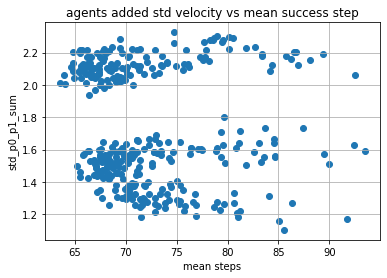

In [15]:
plt.scatter(agents_statistics["mean_steps"], agents_statistics["std_meanvel_p0"]+agents_statistics["std_meanvel_p1"])
plt.plot()
plt.title("agents added std velocity vs mean success step")
plt.ylabel("std_p0_p1_sum")
plt.xlabel("mean steps")
plt.grid()
plt.show()

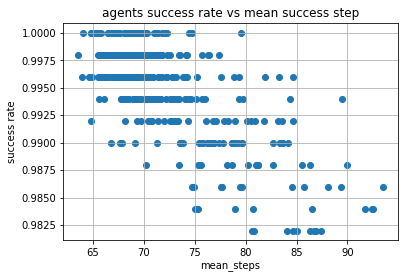

In [13]:
plt.scatter(agents_statistics["mean_steps"], agents_statistics["success_rate"])
plt.plot()
plt.title("agents success rate vs mean success step")
plt.xlabel("mean_steps")
plt.ylabel("success rate")
plt.grid()
plt.show()

In [13]:
agents_statistics_selected = agents_statistics[agents_statistics["mean_steps"]<67]

In [14]:
run_progress.head()

,steps,success,pitch_size,Averagevel_player_0,Stdvel_player_0,Averagevel_player_1,Stdvel_player_1
0,301,0,"(20.722196730468053, 15.541647547851039)",0.167658,0.938836,0.485358,0.419533
1,301,0,"(20.957749517044466, 15.71831213778335)",0.271559,1.667902,0.824055,1.668201
2,301,0,"(20.996300364677115, 15.747225273507837)",0.434331,1.413249,0.423147,0.952410
3,301,0,"(20.61135434866059, 15.458515761495441)",0.050254,1.467168,0.256374,0.803742
4,85,1,"(23.047110105152036, 17.28533257886403)",2.068684,1.427989,0.501973,0.873016


In [15]:
import re
experiment_path = lambda x: "\\".join(x.split('\\')[:-2]).replace(base_path, "")
model_detector = lambda x: re.search('(?<=_model)[0-9]*', x).group(0)



In [16]:
model_detector(agents_statistics_selected.index[0])

'2889999'

In [17]:
models = list(map(model_detector, agents_statistics_selected.index))
path_orig = list(map(experiment_path, agents_statistics_selected.index))

In [27]:
agents_statistics_selected.index


Index(['D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_02-23-31_model2889999.pt_test_run',
       'D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_02-56-35_model2989999.pt_test_run',
       'D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_04-09-33_model2579999.pt_test_run',
       'D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_08-03-37_model2799999.pt_test_run',
       'D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_td3_soccer_goal_pass_join_2vs0_01_07_2022_00_03_58\test_results\2022-01-21_10-08-13_model2319999.pt_test_run',
       'D:\rl_soccer\results\resultados\T1_2vs0_final\2022-01-07_00-03-58_t

In [19]:
matrix = np.concatenate([np.array(path_orig)[..., None], np.array(models)[..., None]], -1)

In [20]:
model_df = pd.DataFrame(matrix,columns=["model_path", "model_name"])

In [21]:
model_df.head()

,model_path,model_name
0,2022-01-07_00-03-58_td3_soccer_goal_pass_join_...,2889999
1,2022-01-07_00-03-58_td3_soccer_goal_pass_join_...,2989999
2,2022-01-07_00-03-58_td3_soccer_goal_pass_join_...,2579999
3,2022-01-07_00-03-58_td3_soccer_goal_pass_join_...,2799999
4,2022-01-07_00-03-58_td3_soccer_goal_pass_join_...,2319999


In [26]:
model_df.to_csv(os.path.join(base_path,"selected_models.csv"))

In [23]:
with open("models.txt", "w") as f:
    for model in models:
        f.write(model)
        f.write("\n")
        


In [24]:
with open("origen_path.txt", "w") as f:
    for model in path_orig:
        f.write(model)
        f.write("\n")

In [25]:
import os.path as osp
with open("D:\\rl_soccer\\results\\resultados\\T1_2vs0_final\\agents_2vs_2T1.py", "w") as f:
    f.write("Teams = [\n")
    for i in model_df.index:
        row = model_df.iloc[i]
        path = row.model_path.encode('utf-8').decode()
        model_name = row.model_name
        f.write(f"('{path}', {model_name}),\n")
    f.write("\n]")

experiment_path(agents_statistics_selected.index[0])

In [ ]:
osp.normpath(model_df.iloc[0].model_path)

In [ ]:
model_df.iloc[0].model_path